<a href="https://colab.research.google.com/github/Ignacioelamo/LLMs4Phishing/blob/main/02_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación Previa

## Descargas

In [ ]:
!pip install --upgrade --force-reinstall gensim pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.

In [ ]:
!pip install --upgrade --force-reinstall pandas numpy==1.26.4

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstal

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
NOMBRE_ARCHIVO = 'emails.csv'

!wget https://raw.githubusercontent.com/Ignacioelamo/LLMs4Phishing/main/data/01_combined_cleaned_email_data.csv -O $NOMBRE_ARCHIVO

--2025-05-27 11:05:06--  https://raw.githubusercontent.com/Ignacioelamo/LLMs4Phishing/main/data/01_combined_cleaned_email_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10064045 (9.6M) [text/plain]
Saving to: ‘emails.csv’

emails.csv          100%[===================>]   9.60M  --.-KB/s    in 0.04s   

2025-05-27 11:05:07 (264 MB/s) - ‘emails.csv’ saved [10064045/10064045]



## Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re


import spacy
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from keybert import KeyBERT

# Extracción de las características del cuerpo del correo:
1. **body_html=contains_html**: This is a binary feature that represents the presence of HTML in the email body.  
2. **body_forms**: This binary feature represents the presence of forms in HTML email bodies.
3. **body_noWords**: This feature measures the total number of words occurring in the email.
4.  **body_noCharacters**: This feature measures the total number of characters occurring in the email body.
5.  **body_noDistinctWords**: This feature measures the total number of distinct words occurring in the body of the email.  
6. **body_richness**: The richness is defined as the ratio of the number of words to the number of characters in the document.
$$
\text{body_richness} = \frac{\text{body_noWords}}{\text{body_noCharacters}}
$$
8. **body_noFunctionWords** Chandrasekaran [6] also listed a set of function words that included:  
`account`, `access`, `bank`, `credit`, `click`, `identity`, `inconvenience`, `information`, `limited`, `log`, `minutes`, `password`, `recently`, `risk`, `social`, `security`, `service`, and `suspended`.  The `body_noFunctionWords` feature measures the total number of occurrences of these function words in the email body.
9. **body_suspension** This binary feature represents the presence of the word **"suspension"** in the body of the email.  
10.  **body_verifyYourAccount** This binary feature represents the presence of the phrase **"verify your account"** in the body of the email.
11. **body_text** contains information regarding the context and purpose of an email. For this, we extract the plain text from the email body and use word embedding techniques to represent it.

Añadimos las features que ya teníamos: has_attachment, contains_html, urls.

In [ ]:
#Es necesario la version de numpy= 1.26.4
#%pip install --upgrade --force-reinstall numpy==1.26.4 pandas

In [ ]:
df = (
    pd.read_csv(NOMBRE_ARCHIVO)
      .assign(
          # Feature 3: body_noWords (Total number of words)
          body_noWords=lambda df: df['body'].apply(lambda x: len(str(x).split())),

          # Feature 4: body_noCharacters (Total number of characters)
          body_noCharacters=lambda df: df['body'].apply(lambda x: len(str(x))),

          # Feature 5: body_noDistinctWords (Total number of distinct words)
          body_noDistinctWords=lambda df: df['body'].apply(lambda x: len(set(str(x).split()))),

          # Feature 6: body_richness (Ratio of words to characters)
          body_richness=lambda df: df['body'].apply(lambda x: len(str(x).split())) / df['body'].apply(lambda x: len(str(x))),

          # Feature 7: body_noFunctionWords (Count of specific function words)
          body_noFunctionWords=lambda df: df['body'].apply(
              lambda x: sum(1 for word in str(x).split()
                          if word.lower() in ['account', 'access', 'bank', 'credit', 'click',
                                            'identity', 'inconvenience', 'information', 'limited',
                                            'log', 'minutes', 'password', 'recently', 'risk',
                                            'social', 'security', 'service', 'suspended'])
          )
      )
)

Para sacar los tópicos de los correos podemos hacerlo de dos formas:
1. BERTopic: usa embeddings contextuales para agrupar documentos, y luego re-pondera con TF-IDF para extraer términos.
2. LDA: modelo generativo de tópicos sobre Bag-of-Words, que descubre distribuciones de palabras.

## LDA

In [3]:
!pip install spacy
!pip install --upgrade --force-reinstall gensim pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398

In [5]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import nltk

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [30]:
from nltk.corpus import stopwords


stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'http', 'www', ])

In [12]:
df = pd.read_csv(NOMBRE_ARCHIVO)

In [13]:
data = df.body.values.tolist()

# 1. Eliminar direcciones de correo electrónico
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]

# 2. Eliminar URLs
data = [re.sub(r'http\S+|www\S+|https\S+', '', sent, flags=re.MULTILINE) for sent in data]

# 3. Eliminar saltos de línea y normalizar espacios
data = [sent.replace('\n', ' ').replace('\r', ' ') for sent in data]
data = [' '.join(sent.split()) for sent in data]

# 4. Eliminar comillas simples
data = [sent.replace("'", "") for sent in data]

# 5. Eliminar caracteres especiales, mantener solo letras y espacios
data = [re.sub(r'[^a-zA-Z\s]', '', sent) for sent in data]

# 6. Eliminar números sueltos
data = [re.sub(r'\b\d+\b', '', sent) for sent in data]

# 7. Eliminar códigos alfanuméricos largos predominantemente numéricos
data = [
    ' '.join([
        word for word in sent.split()
        if not (len(word) > 3 and any(char.isdigit() for char in word) and not any(char.isalpha() for char in word.replace('.', '')))
    ])
    for sent in data
]

data = [
    re.sub(
        r'\b[a-z]*\d+[a-z\d]*\b',
        lambda m: '' if len(m.group(0)) > 5 and sum(c.isdigit() for c in m.group(0)) > sum(c.isalpha() for c in m.group(0)) / 2 else m.group(0),
        sent
    )
    for sent in data
]



In [25]:
pprint(df['body'][1])
print('\n')
pprint(data[1])

('conquer your fears and find out exactly what a life without limits feels '
 'like million dollar self empowerment program generate 500 1 500 and 3 500 to '
 'your door simply by returning phone calls empower you to share gifts and '
 'realize your ultimate fulfillment allow you to help others with their needs '
 'as well as yourself allow you the opportunity to create a six figure '
 'lifestyle in the next 6 12 months you will not have to sell explain or '
 'convince anyone of anything our program will do this for you if you can '
 'return a phone call this is for you anyone can do this there are no products '
 'for you to buy in this program ever so pick up that phone and call the info '
 'line now to get further details without 0bligation of any kind 1 8oo 57o '
 '1895 regards maybe this is not something you are ready for just yet then '
 'reply back with your desire to not know anymore')


('conquer your fears and find out exactly what a life without limits feels '
 'like million 

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[1])

['conquer', 'your', 'fears', 'and', 'find', 'out', 'exactly', 'what', 'life', 'without', 'limits', 'feels', 'like', 'million', 'dollar', 'self', 'empowerment', 'program', 'generate', 'and', 'to', 'your', 'door', 'simply', 'by', 'returning', 'phone', 'calls', 'empower', 'you', 'to', 'share', 'gifts', 'and', 'realize', 'your', 'ultimate', 'fulfillment', 'allow', 'you', 'to', 'help', 'others', 'with', 'their', 'needs', 'as', 'well', 'as', 'yourself', 'allow', 'you', 'the', 'opportunity', 'to', 'create', 'six', 'figure', 'lifestyle', 'in', 'the', 'next', 'months', 'you', 'will', 'not', 'have', 'to', 'sell', 'explain', 'or', 'convince', 'anyone', 'of', 'anything', 'our', 'program', 'will', 'do', 'this', 'for', 'you', 'if', 'you', 'can', 'return', 'phone', 'call', 'this', 'is', 'for', 'you', 'anyone', 'can', 'do', 'this', 'there', 'are', 'no', 'products', 'for', 'you', 'to', 'buy', 'in', 'this', 'program', 'ever', 'so', 'pick', 'up', 'that', 'phone', 'and', 'call', 'the', 'info', 'line', 'no

In [29]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['high_quality', 'pills', 'canadian_pharmacy', 'presents', 'cheapest', 'viagra_pills', 'online', 'buy', 'quality', 'pills', 'without', 'leaving', 'your', 'computer', 'and', 'we', 'll', 'send', 'them', 'directly', 'to', 'your', 'home', 'no', 'prescriptions', 'check', 'it', 'out', 'it', 'ten', 'times', 'cheaper', 'and', 'same', 'quality', 'click', 'to', 'buy', 'viagra', 'for', 'the', 'lowest_price', 'on', 'the', 'web']


In [31]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [33]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['high_quality', 'pill', 'canadian_pharmacy', 'present', 'cheap', 'pill', 'online', 'buy', 'quality', 'pill', 'leave', 'computer', 'send', 'directly', 'home', 'prescription', 'check', 'time', 'cheap', 'quality', 'click', 'buy', 'viagra', 'low', 'price', 'web']]


In [34]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1)]]


In [35]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [36]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.205*"due" + 0.097*"like" + 0.050*"seek" + 0.041*"instantly" + '
  '0.039*"hand" + 0.028*"ever" + 0.026*"relate" + 0.019*"demand" + '
  '0.014*"human" + 0.013*"light"'),
 (1,
  '0.071*"help" + 0.065*"write" + 0.047*"request" + 0.041*"business" + '
  '0.040*"note" + 0.037*"number" + 0.037*"page" + 0.035*"process" + '
  '0.034*"full" + 0.028*"available"'),
 (2,
  '0.093*"hour" + 0.070*"private" + 0.066*"recent" + 0.064*"ensure" + '
  '0.060*"read" + 0.060*"manage" + 0.040*"minute" + 0.038*"privacy" + '
  '0.037*"letter" + 0.035*"health"'),
 (3,
  '0.069*"get" + 0.044*"time" + 0.042*"make" + 0.039*"need" + 0.035*"want" + '
  '0.030*"see" + 0.030*"take" + 0.029*"know" + 0.029*"use" + 0.025*"give"'),
 (4,
  '0.093*"support" + 0.065*"start" + 0.049*"come" + 0.045*"part" + 0.045*"try" '
  '+ 0.041*"next" + 0.040*"check" + 0.036*"base" + 0.024*"still" + 0.023*"m"'),
 (5,
  '0.123*"enjoy" + 0.079*"friend" + 0.053*"stand" + 0.045*"accord" + '
  '0.045*"organization" + 0.030*"model" + 0.

In [37]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -17.75553428366692

Coherence Score:  0.34719967265905727


In [38]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.353721 -0.208786       1        1  25.835774
3      0.267587 -0.121241       2        1  18.117170
1      0.158506 -0.031933       3        1   9.316458
4      0.065594  0.063184       4        1   6.145461
12     0.111846  0.248338       5        1   6.140293
7      0.064376  0.136470       6        1   4.899267
11     0.115767  0.239069       7        1   4.757194
13     0.030525  0.034282       8        1   3.623924
17    -0.016067 -0.002727       9        1   3.292686
8     -0.012682 -0.000542      10        1   2.953157
10    -0.086367 -0.031082      11        1   2.431131
2     -0.080803 -0.029626      12        1   2.057143
9     -0.102717 -0.034806      13        1   1.791015
15    -0.121365 -0.038023      14        1   1.531721
14    -0.069513 -0.025023      15        1   1.514761
16    -0.126677 -0.038803      16        1   1.506884
0     -0.124330 -0.038471      17        1   1.216745
19    -0.129220 -0.039066      18        1   1.170117
18    -0.137687 -0.039976      19        1   1.162994
5     -0.160494 -0.041238      20        1   0.536106, topic_info=             Term          Freq         Total Category  logprob  loglift
358       account  11480.000000  11480.000000  Default  30.0000  30.0000
144         email  12698.000000  12698.000000  Default  29.0000  29.0000
439           new   5187.000000   5187.000000  Default  28.0000  28.0000
965        update   3099.000000   3099.000000  Default  27.0000  27.0000
337      customer   3845.000000   3845.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
2840      version      0.046717      1.579691  Topic20 -11.0347   1.7077
3334       wallet      0.046720      1.580707  Topic20 -11.0346   1.7071
2567         late      0.046717      1.579795  Topic20 -11.0347   1.7077
2163  transaction      0.046717      1.579874  Topic20 -11.0347   1.7076
2250       verify      0.046717      1.580455  Topic20 -11.0347   1.7072

[719 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
589       2  0.998860        able
907      20  0.900501    absolute
966      13  0.996055      accept
1528      9  0.979780  acceptable
1517      7  0.998887      access
...     ...       ...         ...
296       3  0.999626       write
249       2  0.999522        year
977      13  0.969337   yesterday
76        4  0.998130         yet
1326      9  0.983969       young

[558 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 2, 5, 13, 8, 12, 14, 18, 9, 11, 3, 10, 16, 15, 17, 1, 20, 19, 6])

In [48]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from tqdm.notebook import tqdm

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics using Gensim's LdaModel,
    with progress displayed using tqdm.

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    start : Minimum number of topics (default=2)
    step : Step size to increase the number of topics (default=3)

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []

    total_iterations = ((limit - start) + step - 1) // step  # ceiling division
    for num_topics in tqdm(range(start, limit, step), total=total_iterations, desc="Calculando modelos LDA"):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         update_every=1,
                         chunksize=100,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [49]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=1)


Calculando modelos LDA:   0%|          | 0/38 [00:00<?, ?it/s]

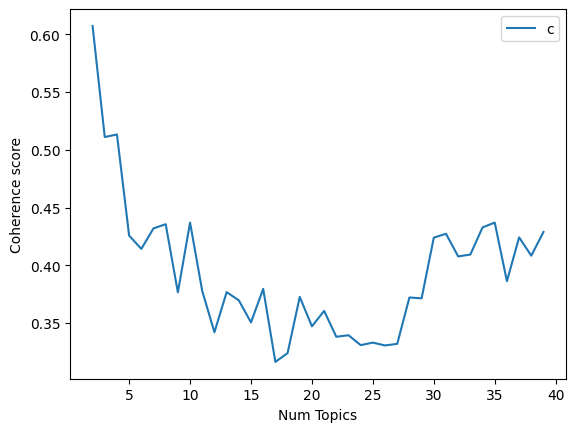

In [50]:
# Show graph
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [56]:
vis = pyLDAvis.gensim.prepare(model_list[3], corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.306007 -0.155290       1        1  46.708336
4      0.108584 -0.166110       2        1  18.935217
3     -0.128958  0.294610       3        1  16.019235
1      0.115348 -0.029847       4        1  13.967720
2      0.211033  0.056637       5        1   4.369493, topic_info=           Term         Freq        Total Category  logprob  loglift
4         click  4308.000000  4308.000000  Default  30.0000  30.0000
144       email  7211.000000  7211.000000  Default  29.0000  29.0000
358     account  8302.000000  8302.000000  Default  28.0000  28.0000
4110     device  2498.000000  2498.000000  Default  27.0000  27.0000
179     receive  4812.000000  4812.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2910    journey   173.775928   234.491197   Topic5  -4.9114   2.8309
4277       coin    84.790011    90.700737   Topic5  -5.6289   3.0631
34325  funtoken   149.214857   211.487751   Topic5  -5.0637   2.7817
8370        nft    98.812320   235.544629   Topic5  -5.4759   2.2618
349       order   100.376216   964.814049   Topic5  -5.4602   0.8675

[267 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1517      2  0.884377    access
1517      4  0.115353    access
358       1  0.999895   account
385       2  0.998666    action
1530      1  0.999146  activity
...     ...       ...       ...
248       4  0.702679      work
296       1  0.057974     write
296       2  0.941870     write
249       3  0.396949      year
249       4  0.602543      year

[374 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 2, 3])

In [ ]:
#Guardame todos los modelos lda en disco



In [57]:
# prompt: Guarda todos los modelos lda en disco

import os

# Directorio para guardar los modelos
output_dir = "lda_models"
os.makedirs(output_dir, exist_ok=True)

# Guardar cada modelo en la lista
for i, model in enumerate(model_list):
    model_filename = os.path.join(output_dir, f"lda_model_{i+start}_topics")
    model.save(model_filename)
    print(f"Modelo con {i+start} tópicos guardado en: {model_filename}")

Modelo con 2 tópicos guardado en: lda_models/lda_model_2_topics
Modelo con 3 tópicos guardado en: lda_models/lda_model_3_topics
Modelo con 4 tópicos guardado en: lda_models/lda_model_4_topics
Modelo con 5 tópicos guardado en: lda_models/lda_model_5_topics
Modelo con 6 tópicos guardado en: lda_models/lda_model_6_topics
Modelo con 7 tópicos guardado en: lda_models/lda_model_7_topics
Modelo con 8 tópicos guardado en: lda_models/lda_model_8_topics
Modelo con 9 tópicos guardado en: lda_models/lda_model_9_topics
Modelo con 10 tópicos guardado en: lda_models/lda_model_10_topics
Modelo con 11 tópicos guardado en: lda_models/lda_model_11_topics
Modelo con 12 tópicos guardado en: lda_models/lda_model_12_topics
Modelo con 13 tópicos guardado en: lda_models/lda_model_13_topics
Modelo con 14 tópicos guardado en: lda_models/lda_model_14_topics
Modelo con 15 tópicos guardado en: lda_models/lda_model_15_topics
Modelo con 16 tópicos guardado en: lda_models/lda_model_16_topics
Modelo con 17 tópicos guar

In [63]:
# prompt: Para cargar todos los modelos en disco

# Para cargar todos los modelos en disco
loaded_models = {}
for i in range(start, limit, step):
    model_filename = os.path.join(output_dir, f"lda_model_{i}_topics")
    if os.path.exists(model_filename):
        loaded_models[i] = LdaModel.load(model_filename)
        print(f"Modelo con {i} tópicos cargado desde: {model_filename}")
    else:
        print(f"Archivo no encontrado: {model_filename}")

# Ahora puedes acceder a los modelos cargados por su número de tópicos, por ejemplo:
# model_10_topics = loaded_models[10]


Modelo con 2 tópicos cargado desde: lda_models/lda_model_2_topics
Modelo con 3 tópicos cargado desde: lda_models/lda_model_3_topics
Modelo con 4 tópicos cargado desde: lda_models/lda_model_4_topics
Modelo con 5 tópicos cargado desde: lda_models/lda_model_5_topics
Modelo con 6 tópicos cargado desde: lda_models/lda_model_6_topics
Modelo con 7 tópicos cargado desde: lda_models/lda_model_7_topics
Modelo con 8 tópicos cargado desde: lda_models/lda_model_8_topics
Modelo con 9 tópicos cargado desde: lda_models/lda_model_9_topics
Modelo con 10 tópicos cargado desde: lda_models/lda_model_10_topics
Modelo con 11 tópicos cargado desde: lda_models/lda_model_11_topics
Modelo con 12 tópicos cargado desde: lda_models/lda_model_12_topics
Modelo con 13 tópicos cargado desde: lda_models/lda_model_13_topics
Modelo con 14 tópicos cargado desde: lda_models/lda_model_14_topics
Modelo con 15 tópicos cargado desde: lda_models/lda_model_15_topics
Modelo con 16 tópicos cargado desde: lda_models/lda_model_16_top

KeyError: 1

In [69]:
NUMERO_TOPICOS



# Example: To visualize the model with 10 topics (assuming it was saved and loaded)

vis = pyLDAvis.gensim.prepare(loaded_models[NUMERO_TOPICOS], corpus, id2word)
vis





PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.142607  0.0       1        1  54.889034
0     -0.142607  0.0       2        1  45.110966, topic_info=             Term         Freq        Total Category  logprob  loglift
204          user  5776.000000  5776.000000  Default  30.0000  30.0000
203   unsubscribe  3310.000000  3310.000000  Default  29.0000  29.0000
3334       wallet  2340.000000  2340.000000  Default  28.0000  28.0000
965        update  2922.000000  2922.000000  Default  27.0000  27.0000
199          team  3132.000000  3132.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1517       access  1194.274043  1480.066654   Topic2  -5.3183   0.5815
296         write  1201.860760  1541.794777   Topic2  -5.3120   0.5470
295           use  1057.306899  1275.889218   Topic2  -5.4401   0.6081
585       support  1074.713911  1538.721984   Topic2  -5.4238   0.4371
44            get  1114.597623  2907.961283   Topic2  -5.3874  -0.1629

[164 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1517      1  0.193235    access
1517      2  0.806720    access
358       1  0.512374   account
358       2  0.487662   account
1530      1  0.106567  activity
...     ...       ...       ...
269       2  0.233587      want
296       1  0.220522     write
296       2  0.779611     write
249       1  0.975192      year
249       2  0.025220      year

[251 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [72]:
# prompt: para descargar la carpeta lda_models desde el google colab hasta mi ordenador

from google.colab import files
files.download('lda_models')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>